In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium
import warnings
warnings.filterwarnings('ignore')

# Load the data
files = [
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202211-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202212-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202301-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202302-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202303-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202304-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202305-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202306-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202307-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202308-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202309-divvy-tripdata.csv',
    '/kaggle/input/bike-share-divvy-datasets-from-nov2022-to-oct-2023/202310-divvy-tripdata.csv'
]

# Read and concatenate the data
df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)


**How does the overall ride distribution look like between casual riders and members?**

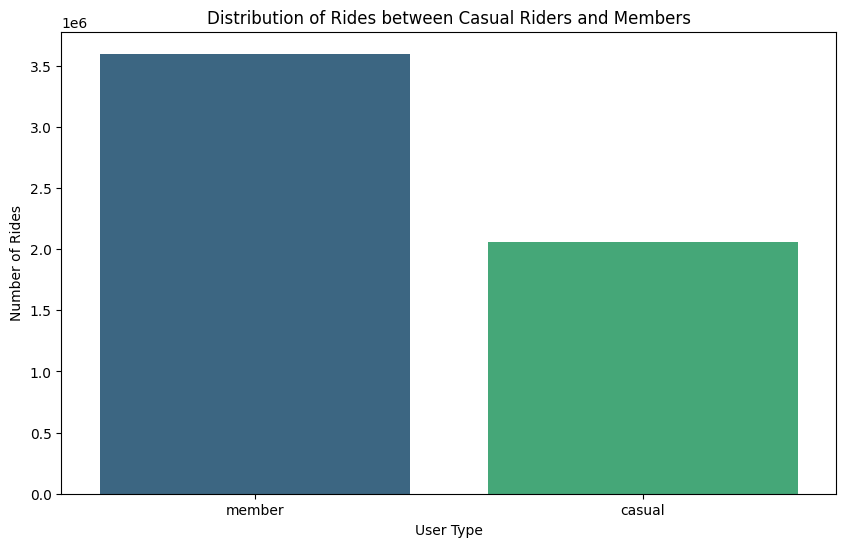

In [2]:
# Plot the distribution of rides between casual riders and members
plt.figure(figsize=(10, 6))
sns.countplot(x='member_casual', data=df, palette='viridis')
plt.title('Distribution of Rides between Casual Riders and Members')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()


**What is the average ride duration for each rideable type?**

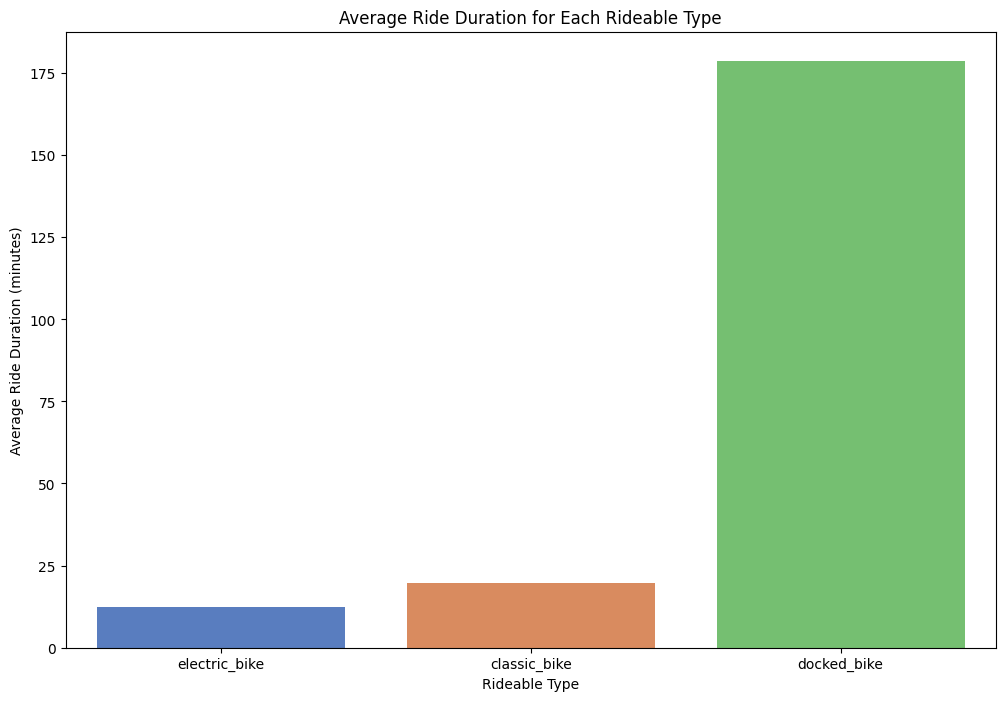

In [3]:
# Convert the 'started_at' and 'ended_at' columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate the ride duration in minutes
df['ride_duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Plot the average ride duration for each rideable type
plt.figure(figsize=(12, 8))
sns.barplot(x='rideable_type', y='ride_duration_minutes', data=df, errorbar=None, palette='muted')
plt.title('Average Ride Duration for Each Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Average Ride Duration (minutes)')
plt.show()


**How does the ride frequency vary across different months?**

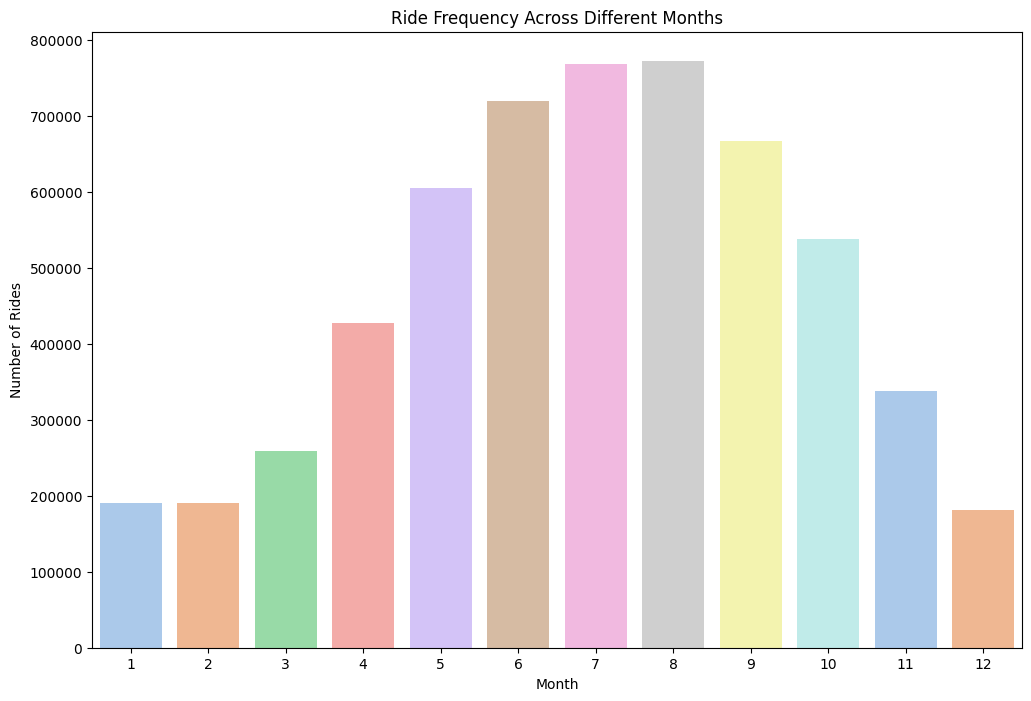

In [4]:
# Extract the month from the 'started_at' column
df['month'] = df['started_at'].dt.month

# Plot the ride frequency across different months
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=df, palette='pastel')
plt.title('Ride Frequency Across Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()


**What are the most popular rideable types among casual riders and members?**

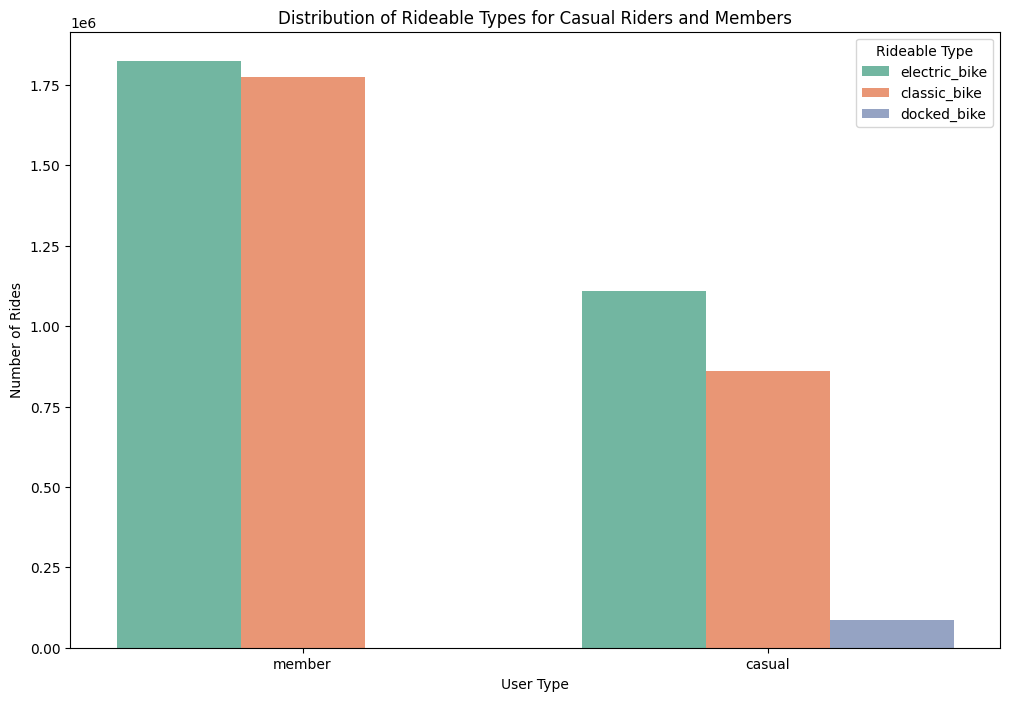

In [5]:
# Create a stacked bar plot to show the distribution of rideable types for each user type
plt.figure(figsize=(12, 8))
sns.countplot(x='member_casual', hue='rideable_type', data=df, palette='Set2')
plt.title('Distribution of Rideable Types for Casual Riders and Members')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.legend(title='Rideable Type', loc='upper right')
plt.show()


**Can we identify any patterns in ride start times throughout the day?**

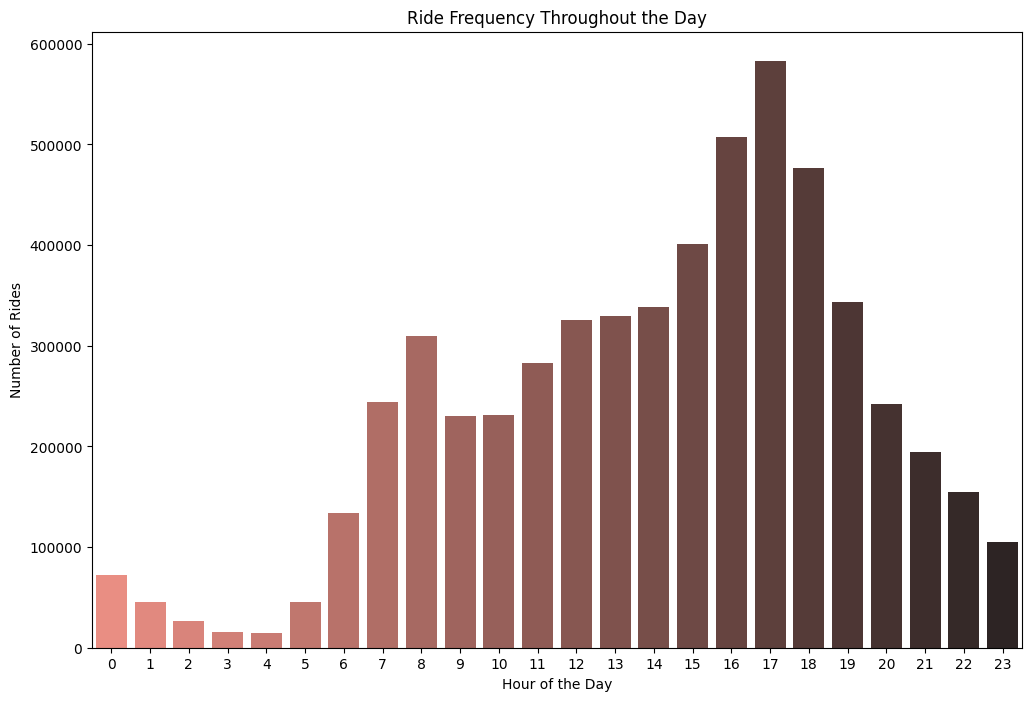

In [6]:
# Extract the hour from the 'started_at' column
df['start_hour'] = df['started_at'].dt.hour

# Plot the ride frequency throughout the day
plt.figure(figsize=(12, 8))
sns.countplot(x='start_hour', data=df, palette='dark:salmon_r')
plt.title('Ride Frequency Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()


**How does the average ride duration vary across different days of the week?**

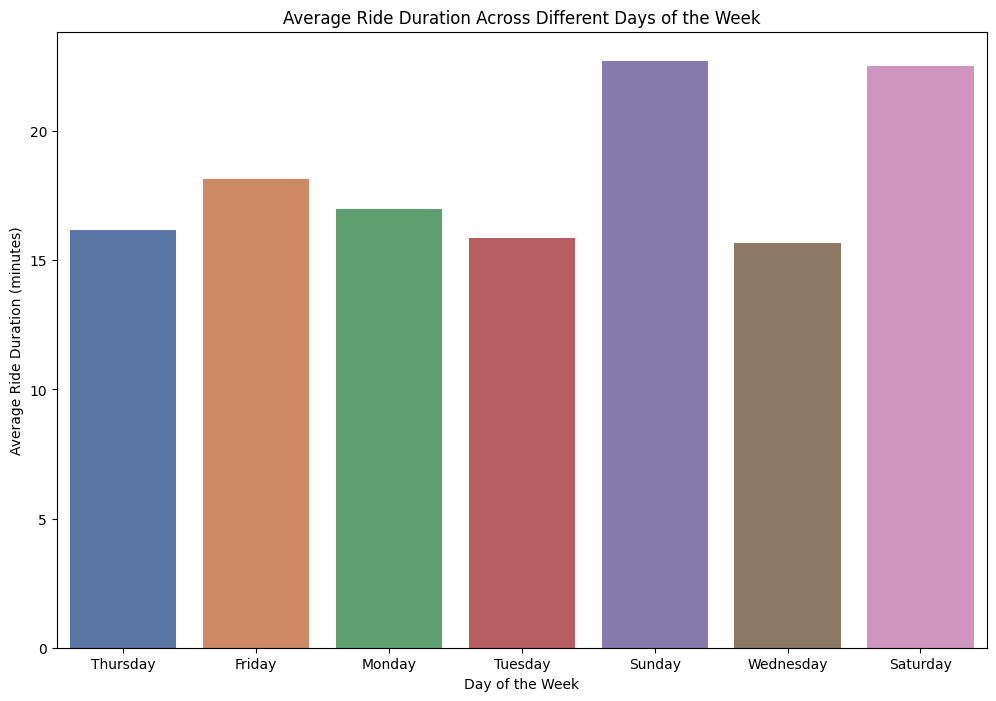

In [7]:
# Extract the day of the week from the 'started_at' column
df['day_of_week'] = df['started_at'].dt.day_name()

# Plot the average ride duration for each day of the week
plt.figure(figsize=(12, 8))
sns.barplot(x='day_of_week', y='ride_duration_minutes', data=df, errorbar=None, palette='deep')
plt.title('Average Ride Duration Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.show()


**What are the top 5 most frequently used start stations?**

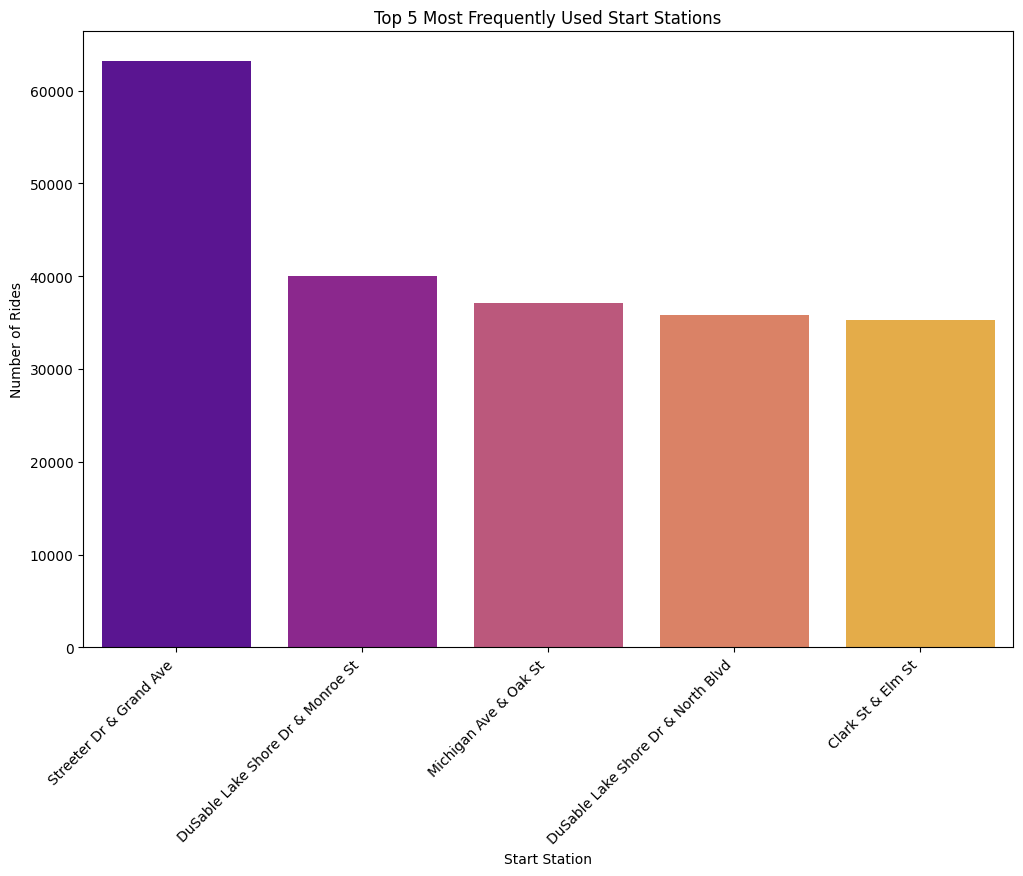

In [8]:
# Find the top 5 most frequently used start stations
top_start_stations = df['start_station_name'].value_counts().head(5)

# Plot the bar chart for the top 5 start stations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_start_stations.index, y=top_start_stations.values, palette='plasma')
plt.title('Top 5 Most Frequently Used Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.show()


**What are the most common end stations for each rideable type?**

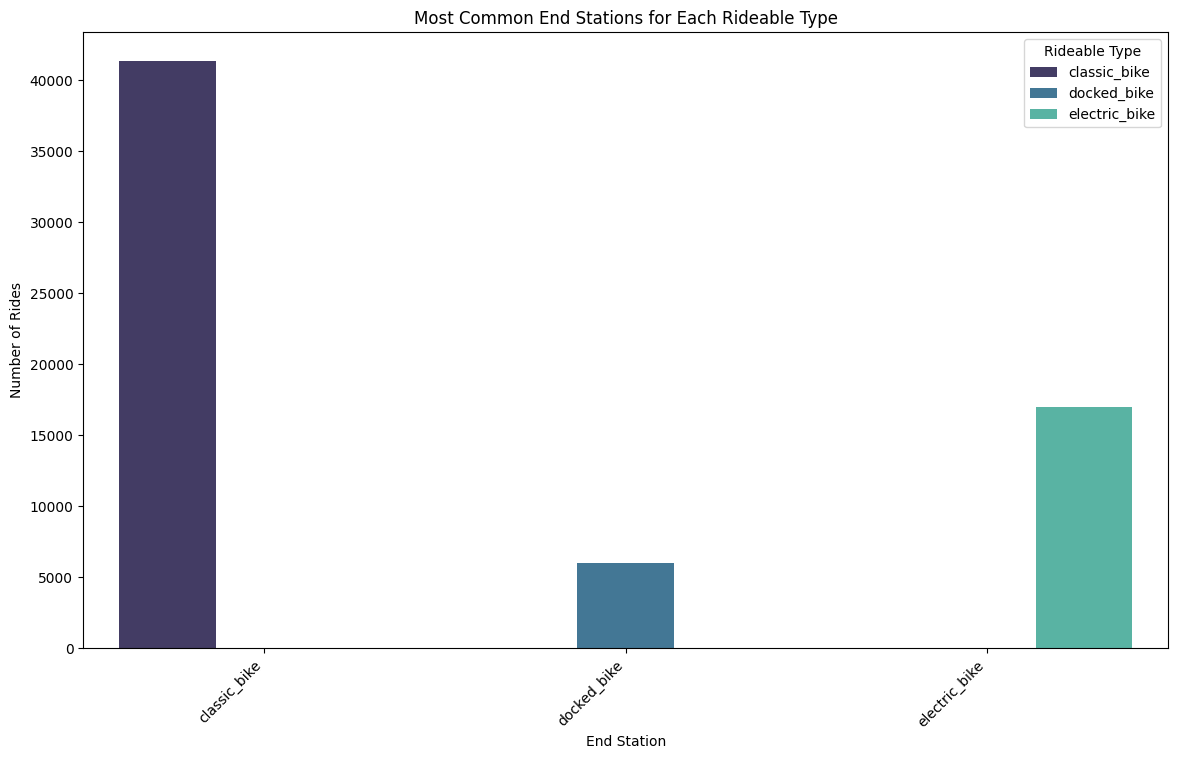

In [9]:
# Find the most common end stations for each rideable type
top_end_stations = df.groupby('rideable_type')['end_station_name'].value_counts().groupby(level=0).nlargest(1)

# Plot the bar chart for the most common end stations for each rideable type
plt.figure(figsize=(14, 8))
sns.barplot(x=top_end_stations.index.get_level_values(1), y=top_end_stations.values, hue=top_end_stations.index.get_level_values(0), palette='mako')
plt.title('Most Common End Stations for Each Rideable Type')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rideable Type', loc='upper right')
plt.show()


**How does the distribution of ride start times vary for different rideable types?**

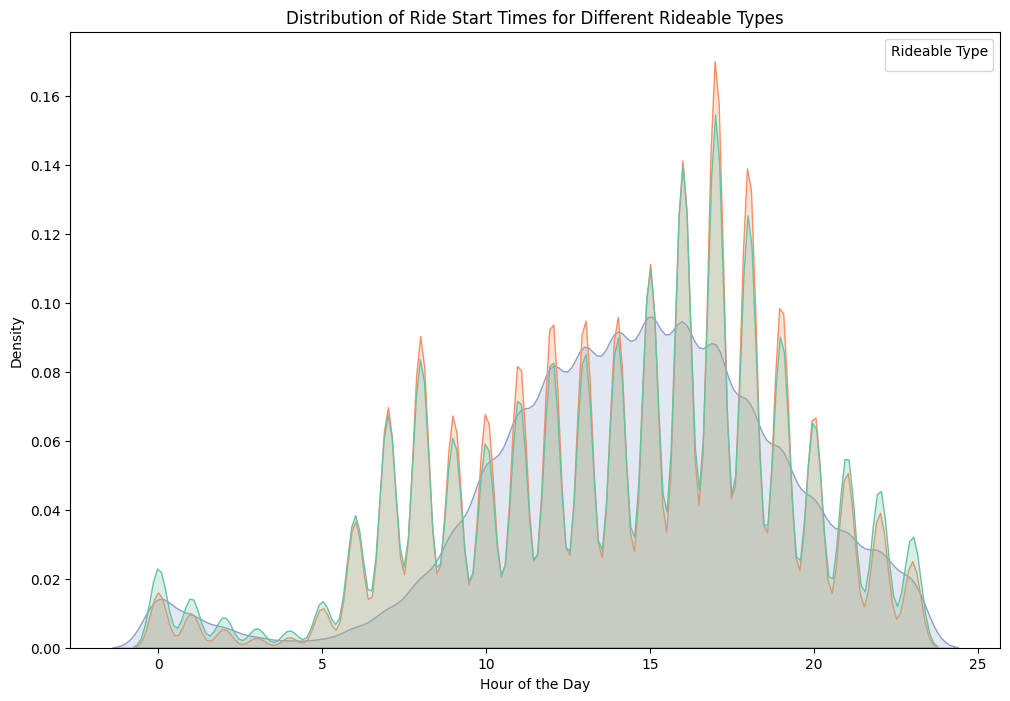

In [10]:
# Extract the hour from the 'started_at' column
df['start_hour'] = df['started_at'].dt.hour

# Create a density plot to show the distribution of ride start times for each rideable type
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='start_hour', hue='rideable_type', fill=True, common_norm=False, palette='Set2')
plt.title('Distribution of Ride Start Times for Different Rideable Types')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.legend(title='Rideable Type', loc='upper right')
plt.show()


**How does the ride duration vary throughout the day for casual riders and members?**

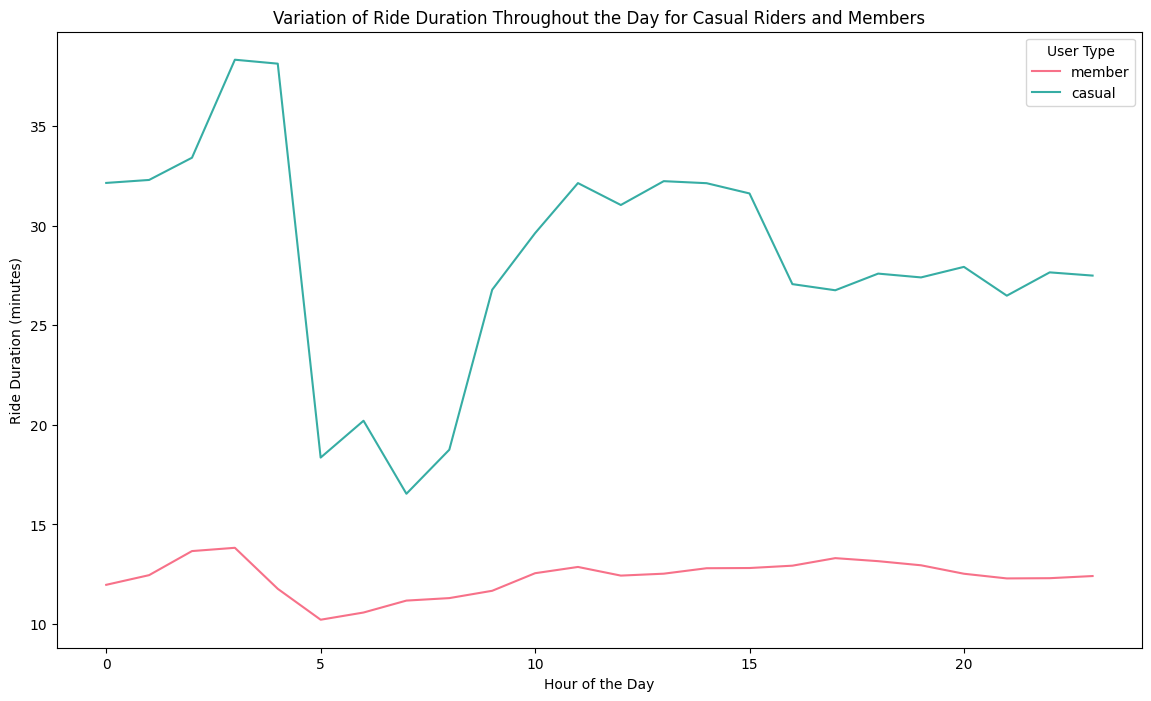

In [11]:
# Create a line plot to show the variation of ride duration throughout the day for casual riders and members
plt.figure(figsize=(14, 8))
sns.lineplot(x='start_hour', y='ride_duration_minutes', hue='member_casual', data=df, ci=None, palette='husl')
plt.title('Variation of Ride Duration Throughout the Day for Casual Riders and Members')
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Duration (minutes)')
plt.legend(title='User Type', loc='upper right')
plt.show()


**Can we identify any patterns in ride start times for different rideable types?**

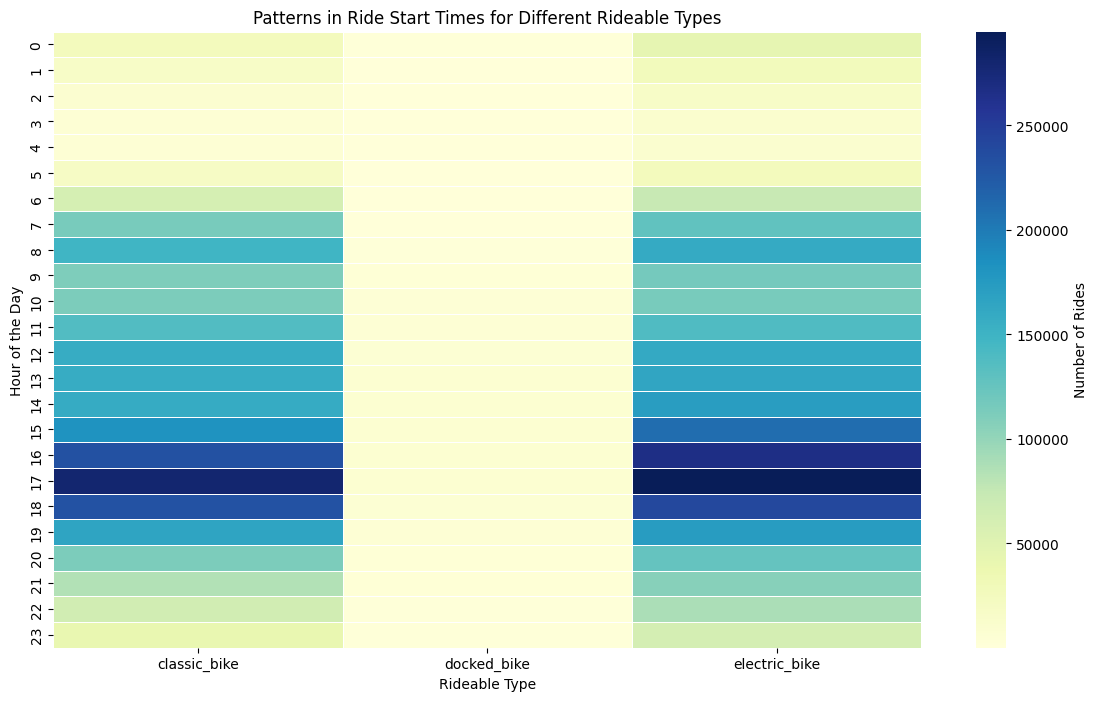

In [12]:
# Create a heatmap to show the patterns in ride start times for different rideable types
pivot_table = df.pivot_table(index='start_hour', columns='rideable_type', values='ride_id', aggfunc='count')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar_kws={'label': 'Number of Rides'}, linewidths=.5)
plt.title('Patterns in Ride Start Times for Different Rideable Types')
plt.xlabel('Rideable Type')
plt.ylabel('Hour of the Day')
plt.show()


**How does the ride frequency vary across different start stations?**

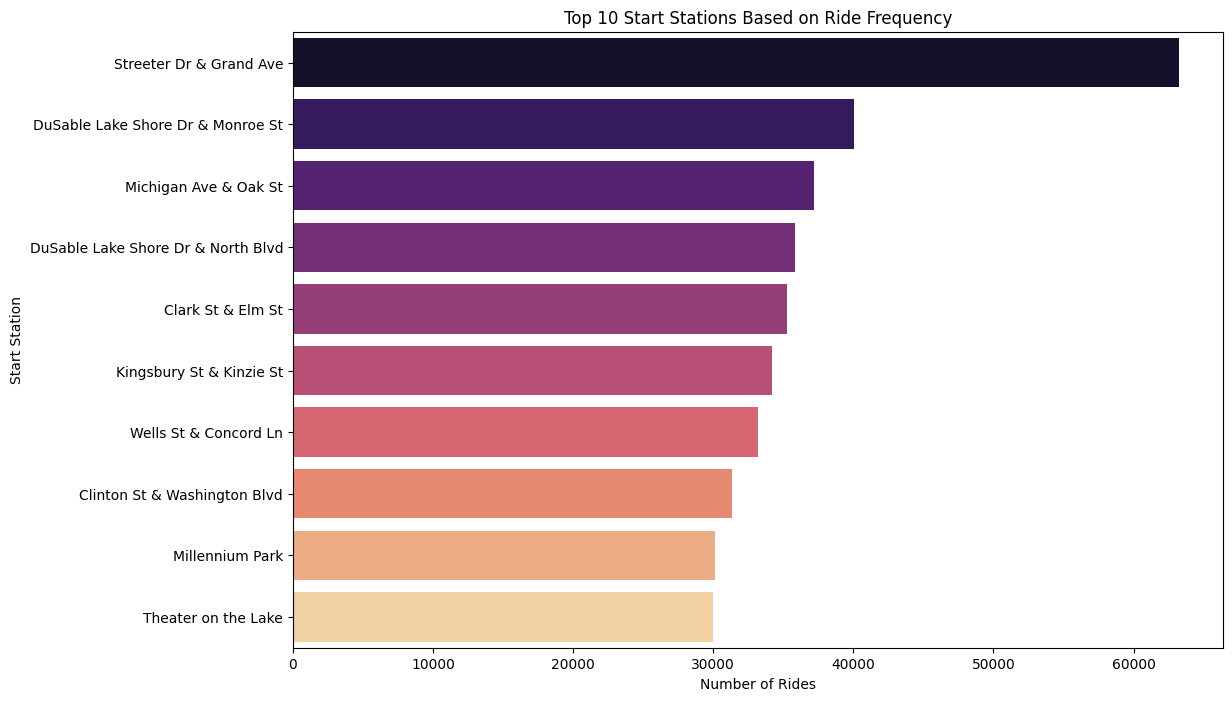

In [13]:
# Find the top 10 start stations based on ride frequency
top_start_stations = df['start_station_name'].value_counts().head(10)

# Plot a horizontal bar chart for the top 10 start stations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette='magma')
plt.title('Top 10 Start Stations Based on Ride Frequency')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station')
plt.show()


**What is the distribution of ride durations for each month?**

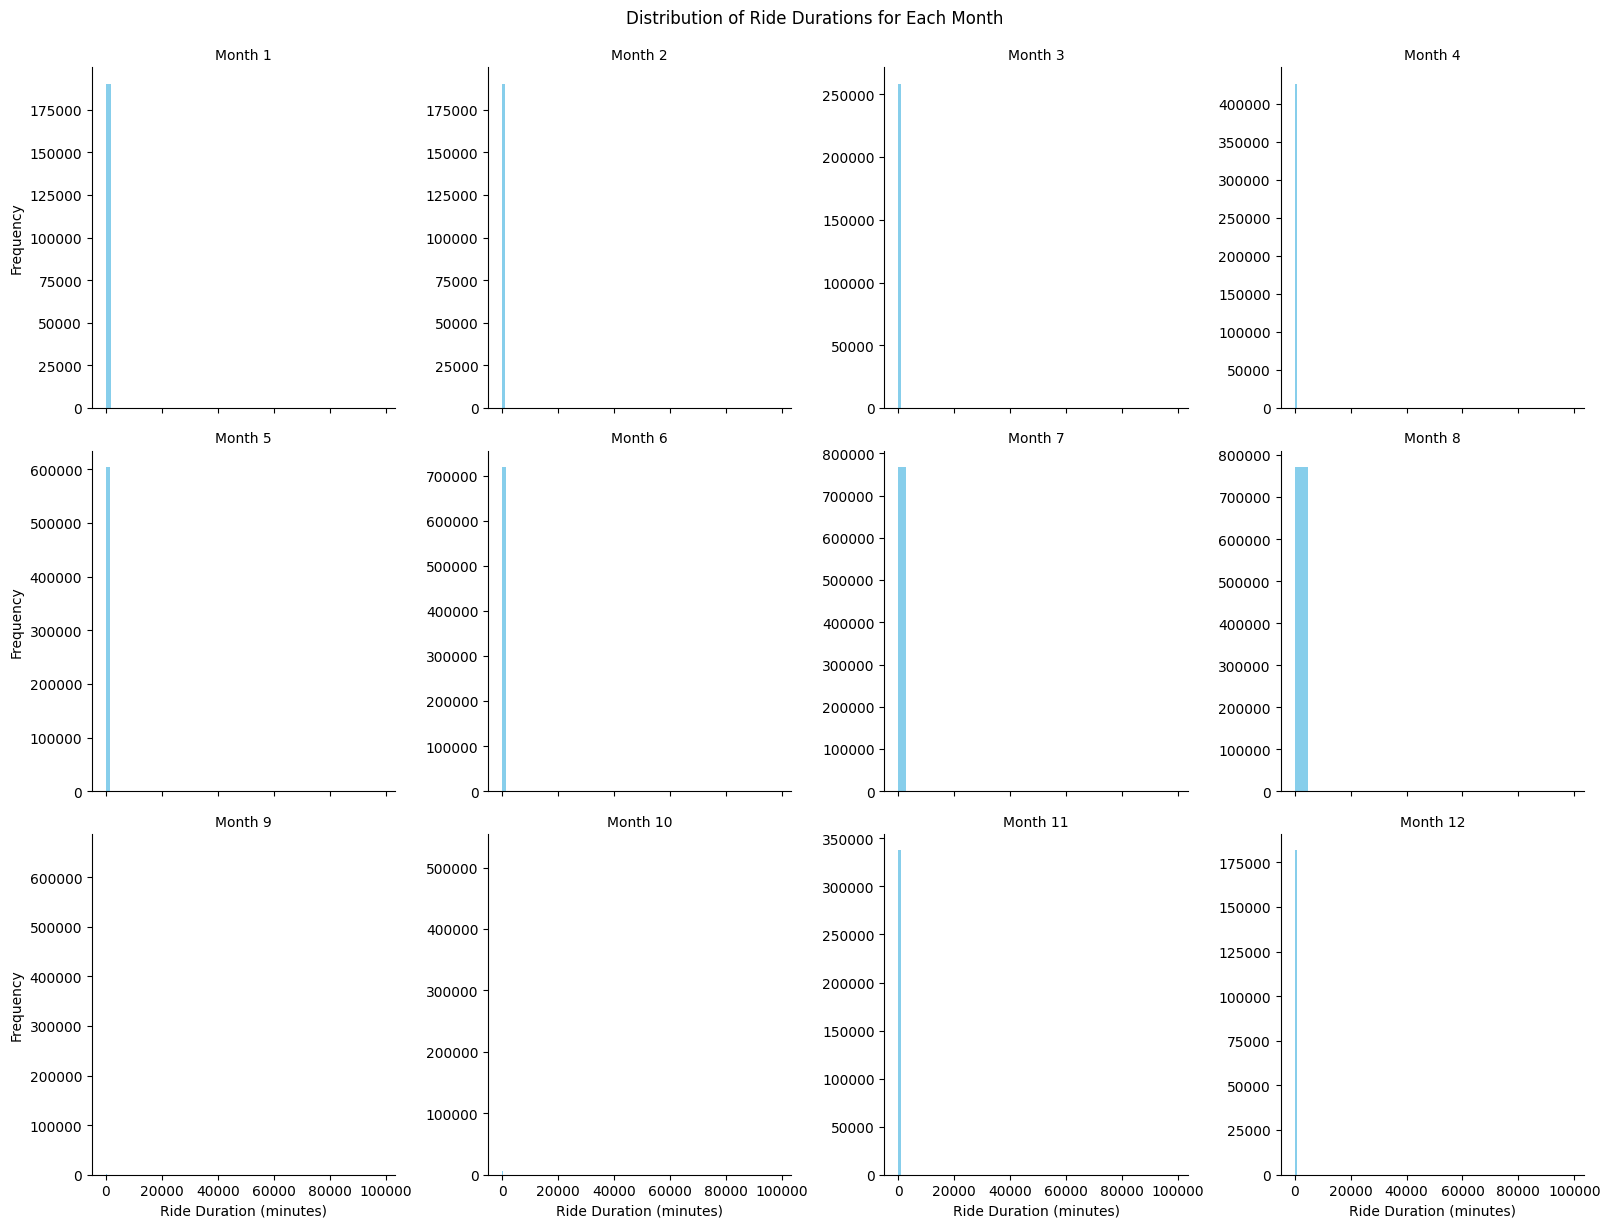

In [14]:
# Create a facet grid of histograms to show the distribution of ride durations for each month
g = sns.FacetGrid(df, col='month', col_wrap=4, height=4, sharey=False)
g.map(plt.hist, 'ride_duration_minutes', bins=20, color='skyblue')
g.set_axis_labels('Ride Duration (minutes)', 'Frequency')
g.set_titles('Month {col_name}')
plt.suptitle('Distribution of Ride Durations for Each Month', y=1.02)
plt.show()


**How does the ride frequency vary for each rideable type on weekends versus weekdays?**

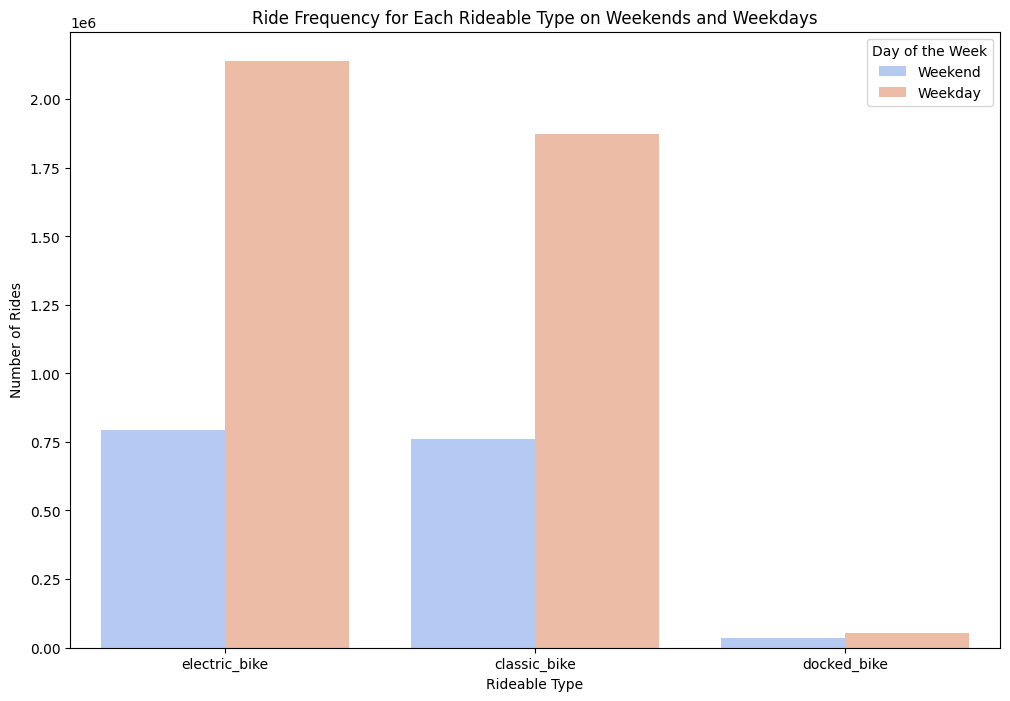

In [15]:
# Create a bar chart to show the ride frequency for each rideable type on weekends and weekdays
df['weekday'] = df['started_at'].dt.dayofweek < 5  # True for weekdays, False for weekends
plt.figure(figsize=(12, 8))
sns.countplot(x='rideable_type', hue='weekday', data=df, palette='coolwarm')
plt.title('Ride Frequency for Each Rideable Type on Weekends and Weekdays')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.legend(title='Day of the Week', labels=['Weekend', 'Weekday'], loc='upper right')
plt.show()


**How does the ride frequency vary across different hours of the day for each rideable type?**

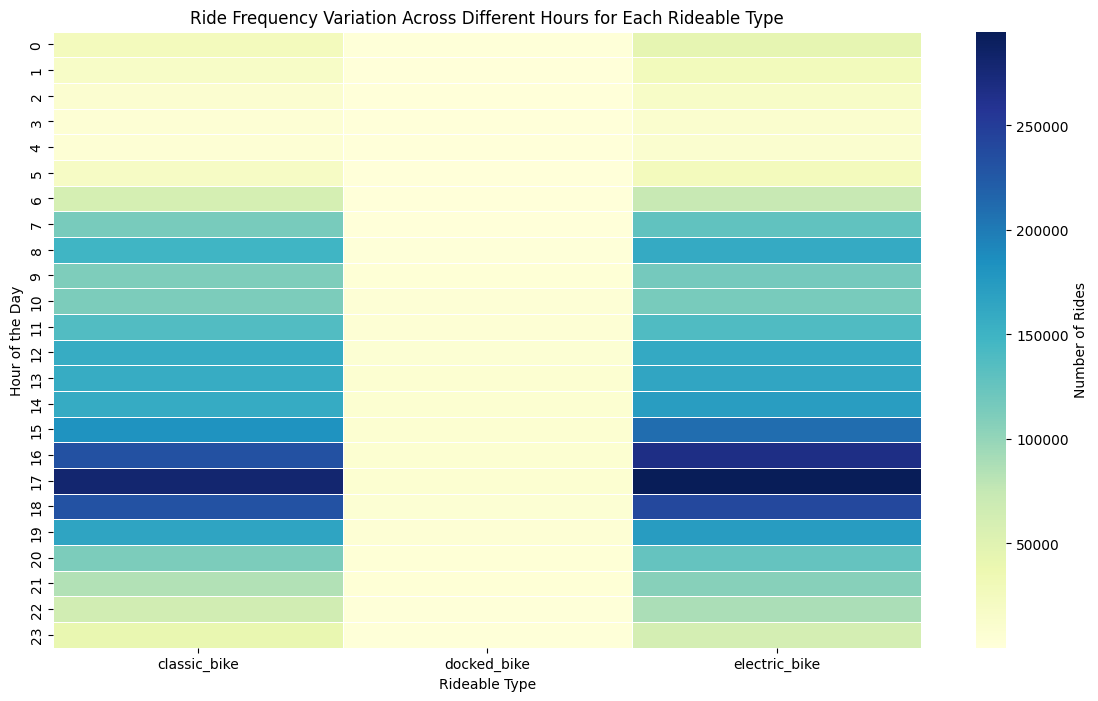

In [16]:
# Create a heatmap to show the ride frequency variation across different hours for each rideable type
pivot_table_hourly = df.pivot_table(index='start_hour', columns='rideable_type', values='ride_id', aggfunc='count')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_hourly, cmap='YlGnBu', cbar_kws={'label': 'Number of Rides'}, linewidths=.5)
plt.title('Ride Frequency Variation Across Different Hours for Each Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Hour of the Day')
plt.show()


**How does the ride duration vary for each start station?**

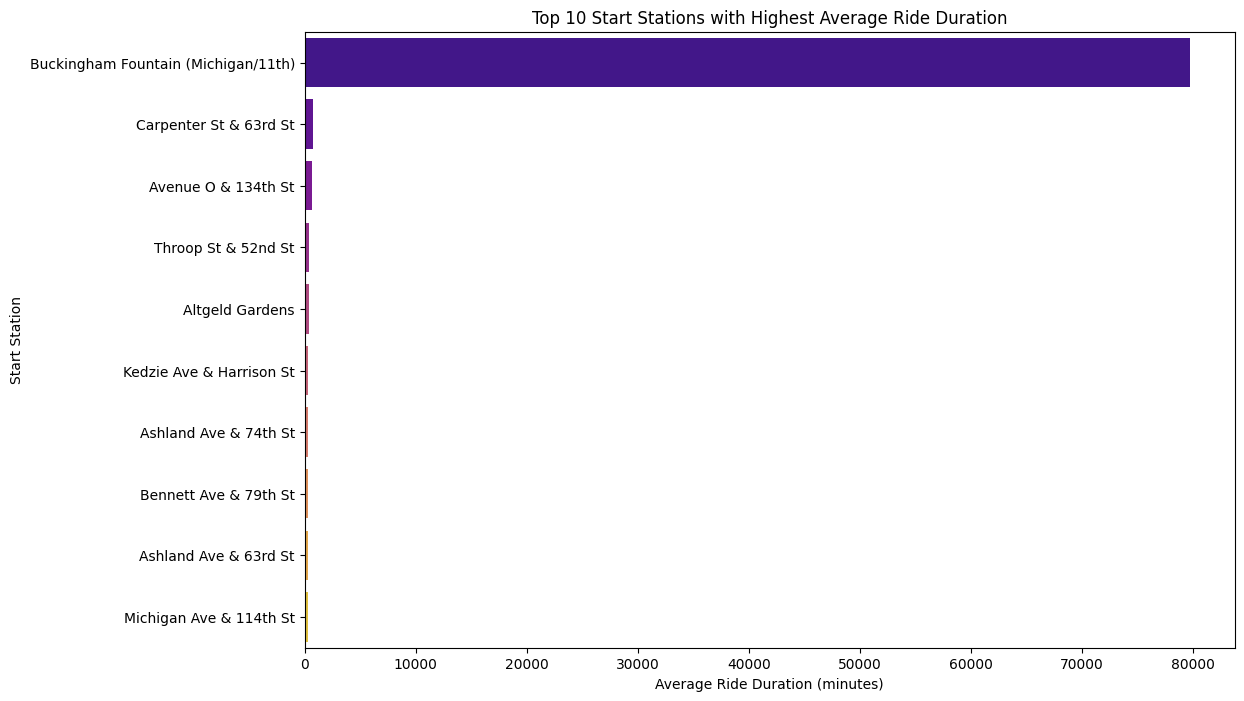

In [17]:
# Find the top 10 start stations based on average ride duration
top_start_stations_avg_duration = df.groupby('start_station_name')['ride_duration_minutes'].mean().nlargest(10)

# Plot a horizontal bar chart for the top 10 start stations with the highest average ride duration
plt.figure(figsize=(12, 8))
sns.barplot(x=top_start_stations_avg_duration.values, y=top_start_stations_avg_duration.index, palette='plasma')
plt.title('Top 10 Start Stations with Highest Average Ride Duration')
plt.xlabel('Average Ride Duration (minutes)')
plt.ylabel('Start Station')
plt.show()


**How does the distribution of ride start times vary between different days of the week?**

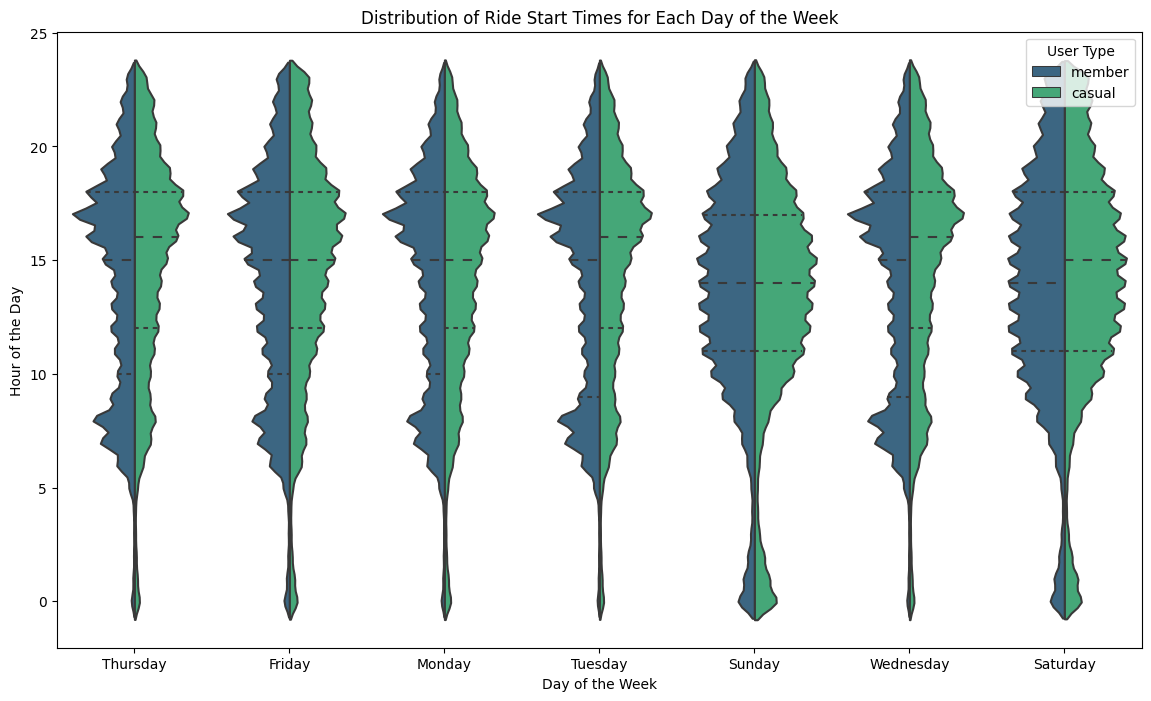

In [18]:
# Create a violin plot to show the distribution of ride start times for each day of the week
plt.figure(figsize=(14, 8))
sns.violinplot(x='day_of_week', y='start_hour', data=df, hue='member_casual', split=True, inner='quartile', palette='viridis')
plt.title('Distribution of Ride Start Times for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.legend(title='User Type', loc='upper right')
plt.show()


**How does the ride frequency vary between different start stations and end stations?**

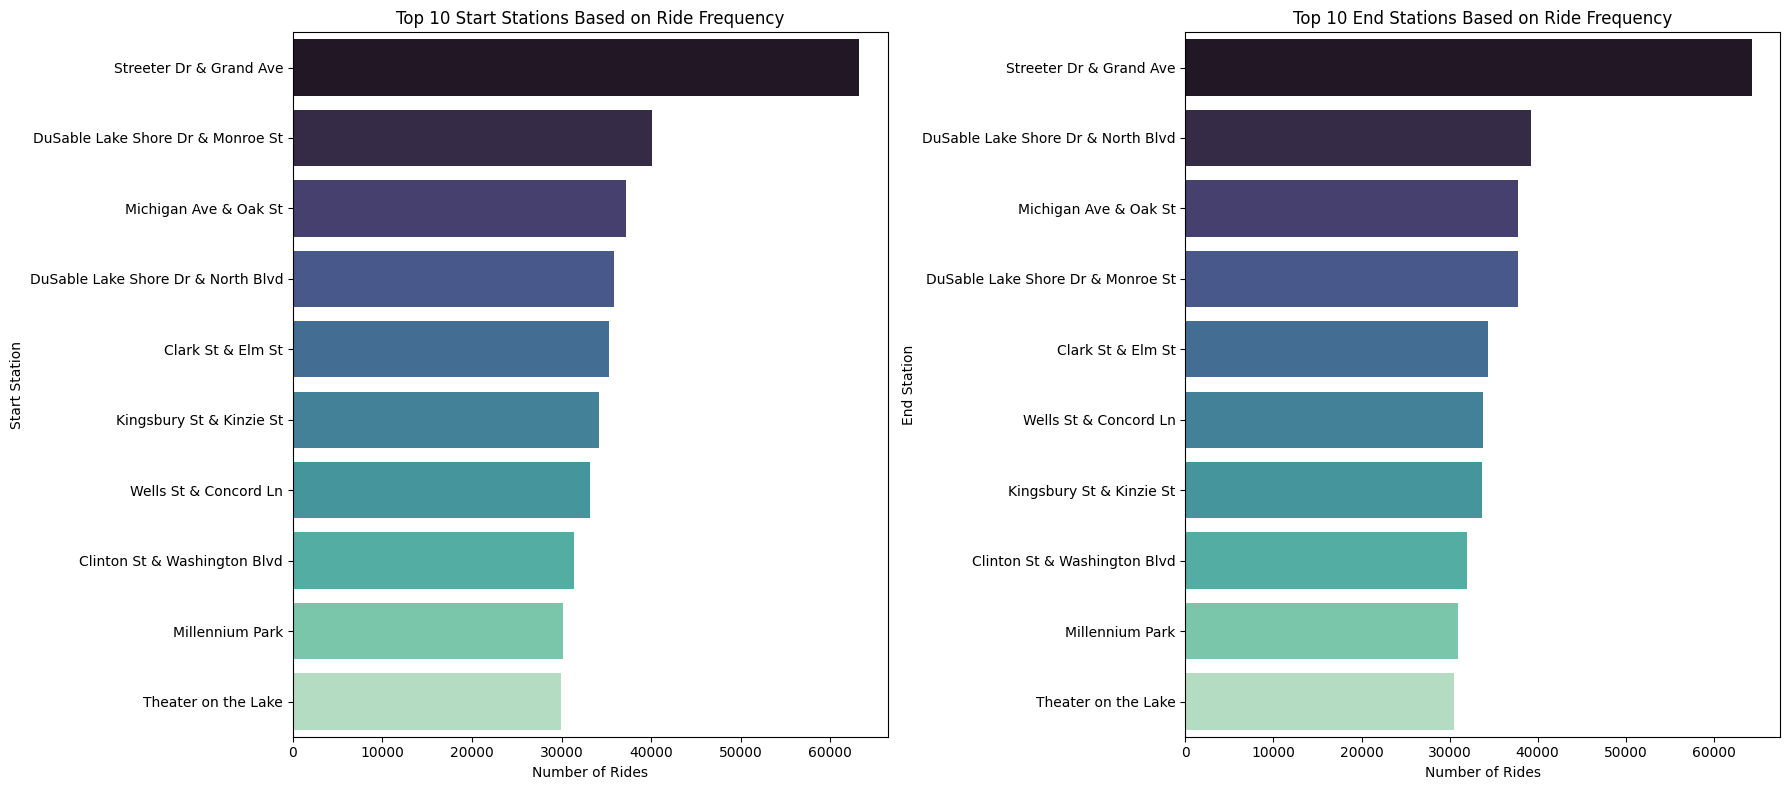

In [19]:
# Find the top 10 start and end stations based on ride frequency
top_start_stations = df['start_station_name'].value_counts().head(10)
top_end_stations = df['end_station_name'].value_counts().head(10)

# Plot a bar chart for the top 10 start and end stations
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette='mako')
plt.title('Top 10 Start Stations Based on Ride Frequency')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station')

plt.subplot(1, 2, 2)
sns.barplot(x=top_end_stations.values, y=top_end_stations.index, palette='mako')
plt.title('Top 10 End Stations Based on Ride Frequency')
plt.xlabel('Number of Rides')
plt.ylabel('End Station')

plt.tight_layout()
plt.show()


**How does the ride frequency vary for each rideable type on different days of the week?**

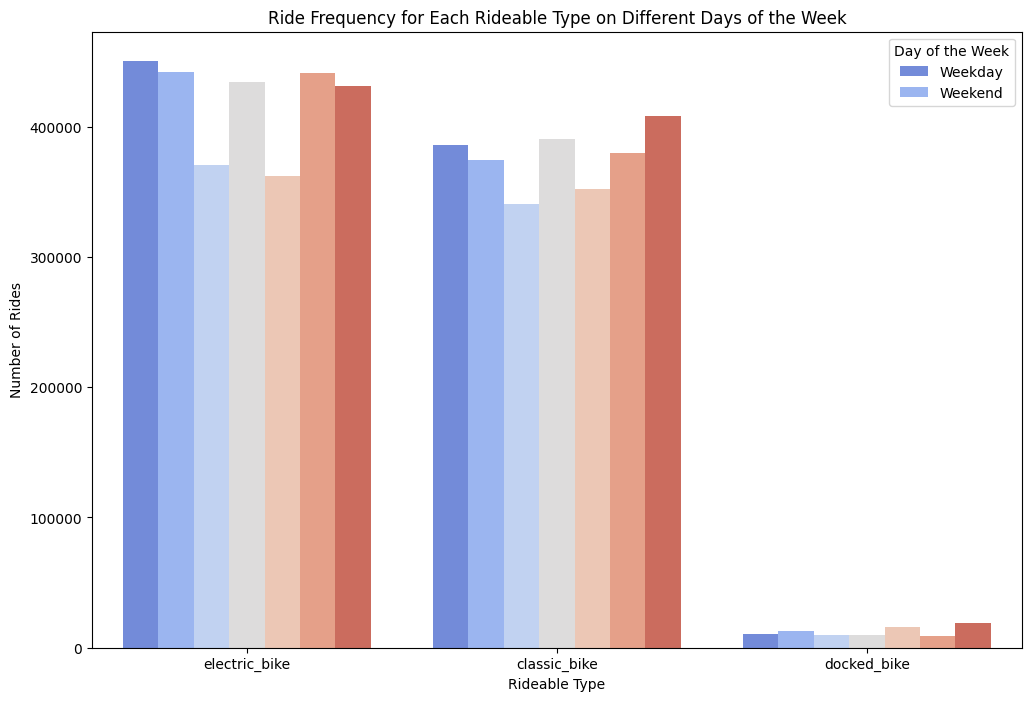

In [20]:
# Create a bar chart to show the ride frequency for each rideable type on different days of the week
plt.figure(figsize=(12, 8))
sns.countplot(x='rideable_type', hue='day_of_week', data=df, palette='coolwarm')
plt.title('Ride Frequency for Each Rideable Type on Different Days of the Week')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.legend(title='Day of the Week', labels=['Weekday', 'Weekend'], loc='upper right')
plt.show()


**How does the ride frequency vary for each rideable type during different seasons?**

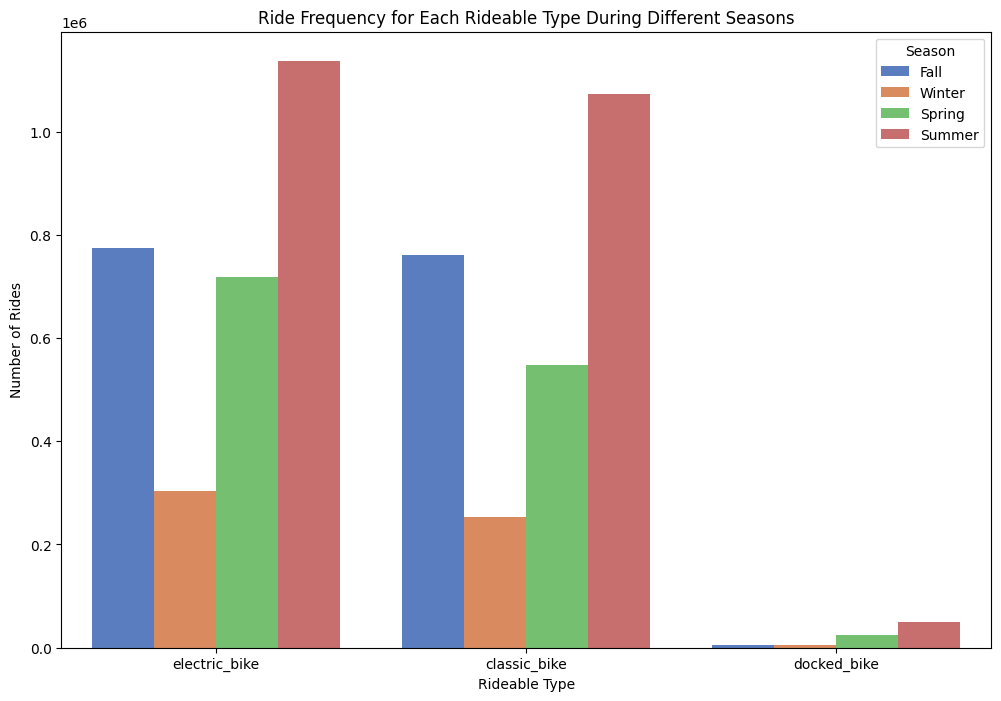

In [21]:
# Map each month to its corresponding season
seasons = {'Winter': [12, 1, 2], 'Spring': [3, 4, 5], 'Summer': [6, 7, 8], 'Fall': [9, 10, 11]}
df['season'] = df['month'].apply(lambda x: next(season for season, months in seasons.items() if x in months))

# Create a bar chart to show the ride frequency for each rideable type during different seasons
plt.figure(figsize=(12, 8))
sns.countplot(x='rideable_type', hue='season', data=df, palette='muted')
plt.title('Ride Frequency for Each Rideable Type During Different Seasons')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.legend(title='Season', loc='upper right')
plt.show()


**How does the average ride duration vary across different months for each rideable type?**

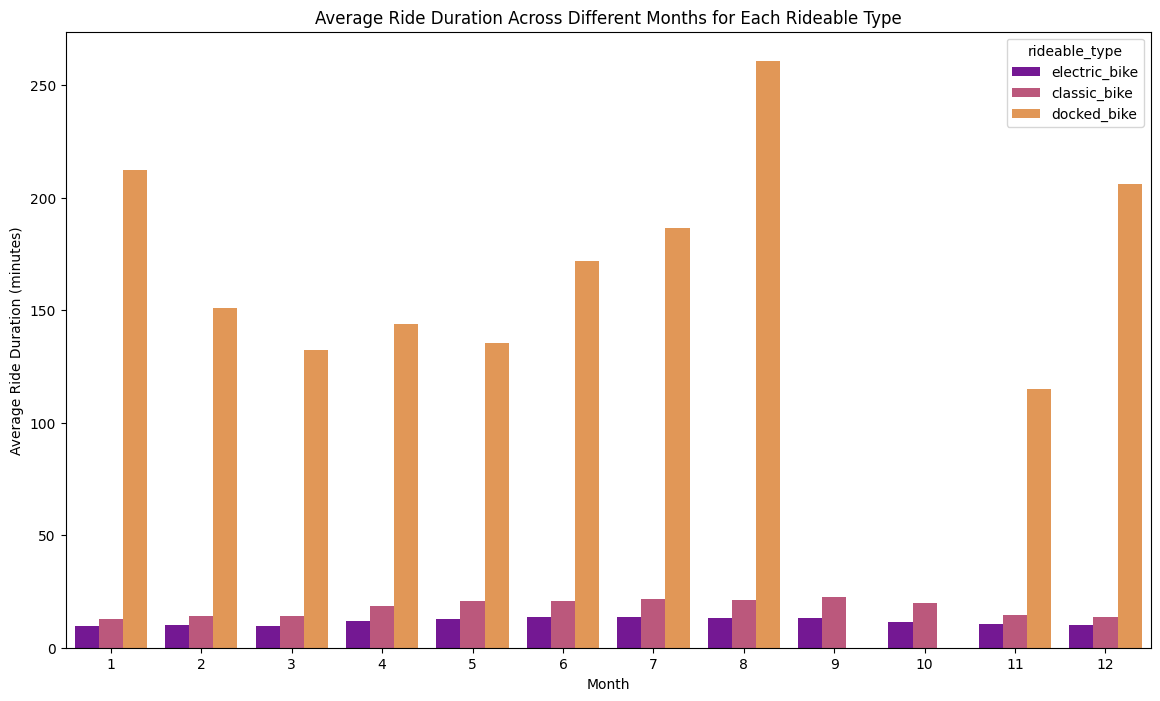

In [22]:
# Plot a bar chart to show the average ride duration for each rideable type across different months
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='ride_duration_minutes', hue='rideable_type', data=df, ci=None, palette='plasma')
plt.title('Average Ride Duration Across Different Months for Each Rideable Type')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (minutes)')
plt.show()


**How does the ride frequency vary for each rideable type based on ride duration categories?**

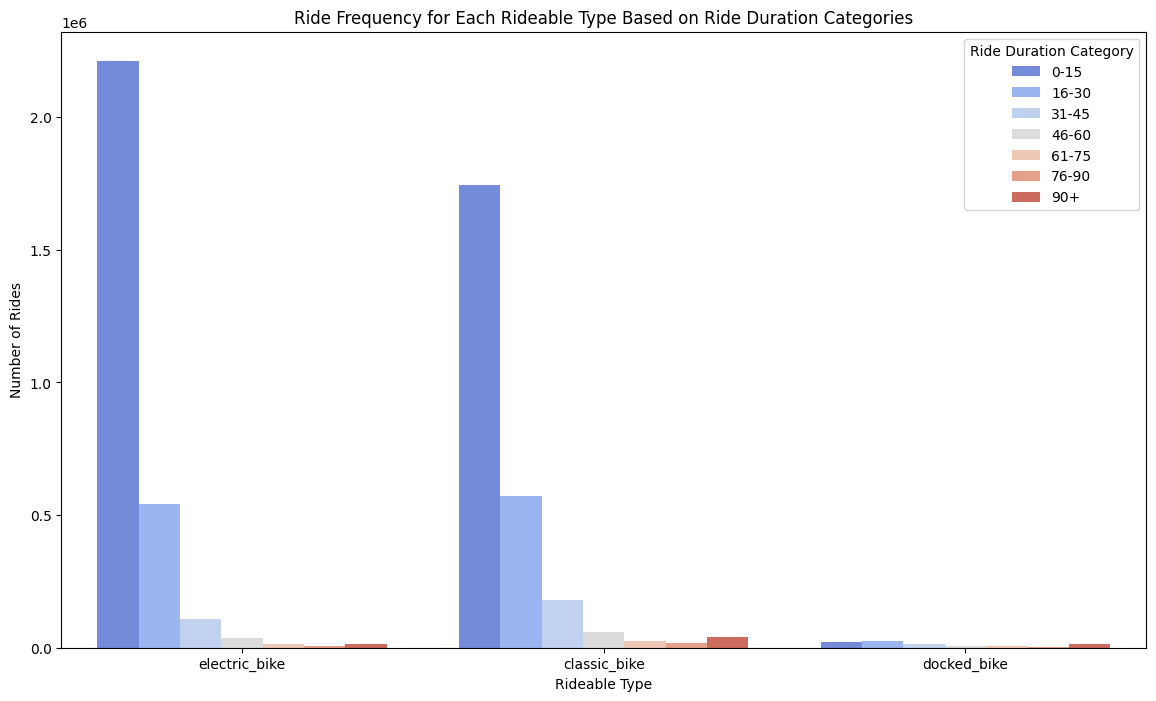

In [23]:
# Create a bar chart to show the ride frequency for each rideable type based on ride duration categories
ride_duration_bins = [0, 15, 30, 45, 60, 75, 90, np.inf]
ride_duration_labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '90+']
df['ride_duration_category'] = pd.cut(df['ride_duration_minutes'], bins=ride_duration_bins, labels=ride_duration_labels)

plt.figure(figsize=(14, 8))
sns.countplot(x='rideable_type', hue='ride_duration_category', data=df, palette='coolwarm')
plt.title('Ride Frequency for Each Rideable Type Based on Ride Duration Categories')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.legend(title='Ride Duration Category', loc='upper right')
plt.show()
